#### Problem 2 Code & Results

Note:  The first two cells is the professor's code. The modified code for Problem 2 starts in the 3rd cell down.

In [1]:
import numpy as np
import scipy.io as sio
import cvxpy as cvx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mat_contents = sio.loadmat('meanvariance.mat')
mu = mat_contents['mu']
S = np.matrix(mat_contents['S'])
d = np.size(mu)

R = (mu.max() - mu.min())/2
#print(R)

Modified code for Problem 2 starts here:

In [3]:
x = cvx.Variable(d)
x_pos = cvx.Variable(d)
x_neg = cvx.Variable(d)
z = cvx.Variable(d, boolean = True)    # define z to be a 0-1 binary vector

x = x_pos - x_neg 
M = 10
alpha = R

objective = cvx.Minimize(cvx.quad_form(x,S))

constraints = [];
constraints += [mu.T*x == alpha]
constraints += [sum(x) == 1]
constraints += [sum(x_neg) <= 1.5]
constraints += [sum(z) <= 60]
constraints += [x_pos + x_neg <= M*z]
constraints += [x_pos >= 0, x_neg >= 0]

prob = cvx.Problem(objective,constraints)
prob.solve()

print('Problem status: ' + str(prob.status));
if (prob.status == 'optimal'):
    print('Problem value: ' + str(prob.value));

Using license file /Users/joehigh/gurobi.lic
Problem status: optimal
Problem value: 0.00011582674389776136


Optimal portfolio


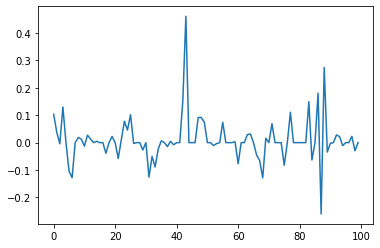

In [4]:
print('Optimal portfolio')
plt.plot(x.value)